# Programming Sheet 1: Bayes Decision Theory (40 P)

In this exercise sheet, we will apply Bayes decision theory in the context of small two-dimensional problems. For this, we will make use of 3D plotting. We introduce below the basics for constructing these plots in Python/Matplotlib.

### The function `numpy.meshgrid`

To plot two-dimensional functions, we first need to discretize the two-dimensional input space. One basic function for this purpose is `numpy.meshgrid`. The following code creates a discrete grid of the rectangular surface $[0,4] \times [0,3]$. The function `numpy.meshgrid` takes the discretized intervals as input, and returns two arrays of size corresponding to the discretized surface (i.e. the grid) and containing the X and Y-coordinates respectively.

In [7]:
import numpy
X_axis,Y_axis = numpy.meshgrid([0,1,2,3,4],[0,1,2,3])
print(X_axis)
print(Y_axis)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]


Note that we can iterate over the elements of the grid by zipping the two arrays `X` and `Y` containing each coordinate. The function `numpy.flatten` converts the 2D arrays to one-dimensional arrays, that can then be iterated element-wise.

In [8]:
print(list(zip(X_axis.flatten(),Y_axis.flatten())))

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3)]


### 3D-Plotting

To enable 3D-plotting, we first need to load some modules in addition to `matplotlib`:

In [9]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

As an example, we would like to plot the L2-norm function $f(x,y) = \sqrt{x^2 + y^2}$ on the subspace $x,y \in [-4,4]$. First, we create a meshgrid with appropriate size:

In [10]:
R = numpy.arange(-4,4+1e-9,0.1)
X_axis,Y_axis = numpy.meshgrid(R,R)
print(X_axis.shape,Y_axis.shape)

(81, 81) (81, 81)


Here, we have used a discretization with small increments of 0.1 in order to produce a plot with better resolution. The resulting meshgrid has size (81x81), that is, approximately 6400 points. The function $f$ needs to be evaluated at each of these points. This is achieved by applying element-wise operations on the arrays of the meshgrid. The norm at each point of the grid is therefore computed as:

In [12]:
F = (X_axis**2+Y_axis**2)**.5
print(F.shape)

(81, 81)


The resulting function values are of same size as the meshgrid. Taking `X`,`Y`,`F` jointly results in a list of approximately 6400 triplets representing the x-, y-, and z-coordinates in the three-dimensional space where the function should be plotted. The 3d-plot can now be constructed easily by means of the function `scatter` of `matplotlib.pyplot`.

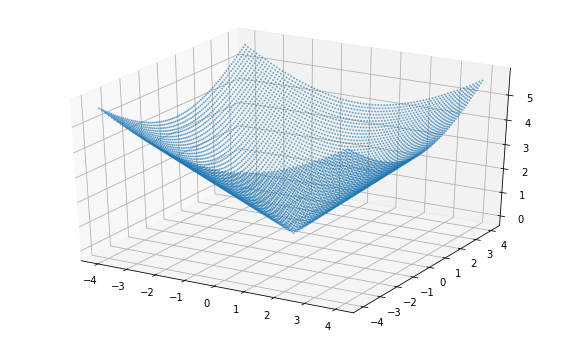

In [13]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X_axis,Y_axis,F,s=1,alpha=0.5)

The parameter `s` and `alpha` control the size and the transparency of each data point. Other 3d plotting variants exist (e.g. surface plots), however, the scatter plot is the simplest approach at least conceptually. Having introduced how to easily plot 3D functions in Python, we can now analyze two-dimensional probability distributions with this same tool.

## Exercise 1: Gaussian distributions (5+5+5 P)

Using the technique introduced above, we would like to plot a normal Gaussian probability distribution with mean vector $\mu = (0,0)$, and covariance matrix $\Sigma = I$ also known as standard normal distribution. We consider the same discretization as above (i.e. a grid from -4 to 4 using step size 0.1). For two-dimensional input spaces, the standard normal distribution is given by:
$$
p(x,y) = \frac{1}{2\pi}e^{-0.5 (x^2+y^2)}.
$$
This distribution sums to $1$ when integrated over $\mathbb{R}^2$. However, it does not sum to $1$ when summing over the discretized space (i.e. the grid). Instead, we can work with a discretized Gaussian-like distribution:
$$
P(x,y) = \frac1Z e^{-0.5 (x^2+y^2)} \qquad \text{with} \quad Z = \sum_{x,y} e^{-0.5 (x^2+y^2)}
$$
where the sum runs over the whole discretized space.

* **Compute the distribution $P(x,y)$, and plot it.**
* **Compute the conditional distribution $Q(x,y) = P((x,y) | \sqrt{x^2+y^2} \geq 1)$, and plot it.**
* **Marginalize the conditioned distribution $Q(x,y)$ over $y$, and plot the resulting distribution $Q(x)$.**

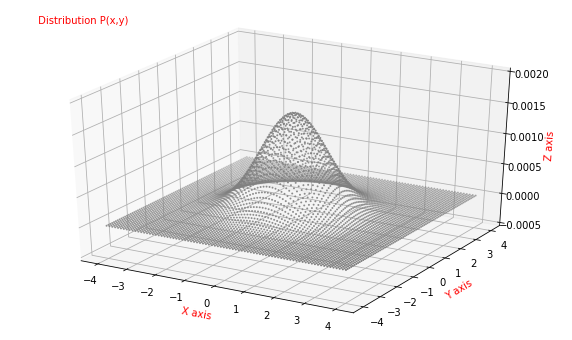

In [15]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import numpy as np


##numpy.arange([start, ]stop, [step, ], dtype=None)
R = np.arange(-4,4+1e-9,0.1)

##Return coordinate matrix
X_axis,Y_axis = np.meshgrid(R,R)

##Calculate  exponential of elements in the input array
Z_axis = np.exp((X_axis**2+Y_axis**2)*-.5)

P = Z_axis/np.sum(Z_axis)
fig = plt.figure(figsize=(10,6))

##plot the 3d plot 
axis = plt.axes(projection='3d')

##assign the coordinates
##List of x-axis tick locations
axis.set_xticks([-4,-2,0,2,4],minor=True)

##List of y-axis tick locations
axis.set_yticks([-4,-2,0,2,4],minor=True)

##z-axis limits for the current axis
axis.set_zlim(-0.0005,0.0020)

# Placement 0, 0 would be the bottom left, 1, 1 would be the top right.
axis.text2D(0.05, 0.95, ' Distribution P(x,y)', transform=axis.transAxes,color='red')


axis.set_xlabel('X axis',color='red')
axis.set_ylabel('Y axis',color='red')
axis.set_zlabel('Z axis',color='red')

##The marker size in points**2 so we will take s=1
axis.scatter(X_axis,Y_axis
    ,P,s=1,color = 'grey')

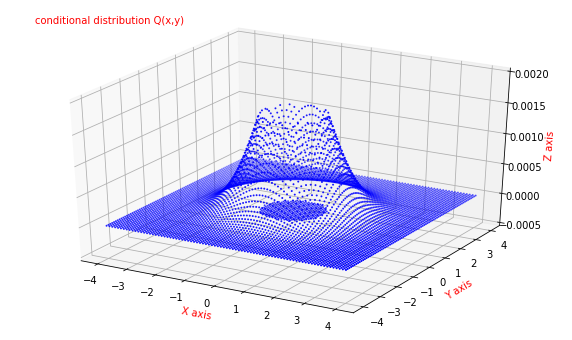

In [16]:
##Compute the conditional distribution  𝑄(𝑥,𝑦)=𝑃((𝑥,𝑦)|𝑥2+𝑦2⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√≥1) , and plot it
##Given 
##The resulting meshgrid has size (81x81), that is,
##approximately 6400 points. The function Fun evaluate each of these points in the meshgrid of 6400 pts.
Fun = (X_axis**2+Y_axis**2)**0.5

##Calculate the exponential of all elements in the input array.
F_exponential = np.exp((X_axis**2+Y_axis**2)*-.5)
##print(F.shape) to check it 
F_exponential[Fun<1] =0
conditional_probablity = F_exponential/np.sum(F_exponential)

fig = plt.figure(figsize=(10,6))

##plot the 3d plot 
axis = plt.axes(projection='3d')


##assign the coordinates
##List of x-axis tick locations
axis.set_xticks([-4,-2,0,2,4],minor=True)

##List of y-axis tick locations
axis.set_yticks([-4,-2,0,2,4],minor=True)

##z-axis limits for the current axis
axis.set_zlim(-0.0005,0.0020)

# Placement 0, 0 would be the bottom left, 1, 1 would be the top right.
axis.text2D(0.05, 0.95, 'conditional distribution Q(x,y)', transform=axis.transAxes,color='red')


axis.set_xlabel('X axis',color='red')
axis.set_ylabel('Y axis',color='red')
axis.set_zlabel('Z axis',color='red')
axis.scatter(X_axis,Y_axis,conditional_probablity,s=1, color = 'blue')

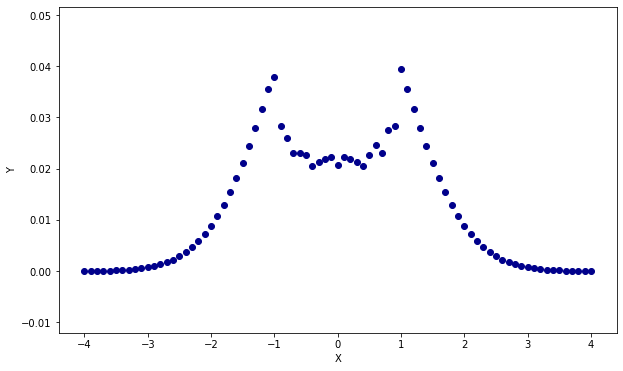

In [17]:
##Marginalize the conditioned distribution  𝑄(𝑥,𝑦)  over  𝑦 , and plot the resulting distribution  𝑄(𝑥) .
MargCondDist = conditional_probablity.sum(axis=0)

##refer fig = plt.figure(figsize=(10,6)) from 3 d plotting
fig = plt.figure(figsize=(10, 6))

axis = plt.axes()

plt.ylabel('Y')
plt.xlabel('X')

##Axes.scatter(self, x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)[source]
axis.scatter(R, MargCondDist,s=None,color = 'darkblue')




## Exercise 2: Bayesian Classification (5+5+5 P)

Let the two coordinates x and y be now representated as a two-dimensional vector $\boldsymbol{x}$. We consider two classes $\omega_1$ and $\omega_2$ with data-generating Gaussian distributions $p(\boldsymbol{x}|\omega_1)$ and $p(\boldsymbol{x}|\omega_2)$ of mean vectors
$$\boldsymbol{\mu}_1 = (-0.5,-0.5) \quad \text{and} \quad \boldsymbol{\mu}_2 = (0.5,0.5)$$
respectively, and same covariance matrix
$$\Sigma = \begin{pmatrix}1.0&0\\0&0.5\end{pmatrix}.$$
Classes occur with probability $P(\omega_1) = 0.9$ and $P(\omega_2) = 0.1$. Analysis tells us that in such scenario, the optimal decision boundary between the two classes should be linear. We would like to verify this computationally by applying Bayes decision theory on grid-like discretized distributions.

* ** Using the same grid as in Exercise 1, discretize the two data-generating distributions $p(\boldsymbol{x}|\omega_1)$ and $p(\boldsymbol{x}|\omega_2)$ (i.e. create discrete distributions $P(\boldsymbol{x}|\omega_1)$ and $P(\boldsymbol{x}|\omega_2)$ on the grid), and plot them with different colors.**
* **From these distributions, compute the total probability distribution $P(\boldsymbol{x}) = \sum_{c \in \{1,2\}} P(\boldsymbol{x} | \omega_c) \cdot P(\omega_c)$, and plot it.**
* **Compute and plot the class posterior probabilities $P(\omega_1|\boldsymbol{x})$ and $P(\omega_2|\boldsymbol{x})$, and print the Bayes error rate for the discretized case.**

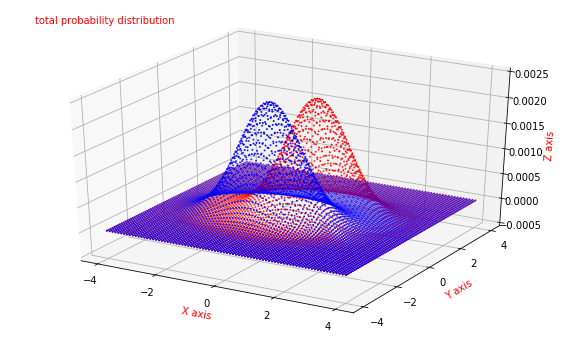

In [18]:

##Classes occur with probability  𝑃(𝜔1)=0.9  and  𝑃(𝜔2)=0.1  be P1 and P2
P1 = 0.9
P2 = 0.1

sqrt_val=np.sqrt(0.5);

class1 = np.exp(((X_axis+0.5)**2+2*(Y_axis+0.5)**2)* -.5)/sqrt_val
class2 = np.exp(((X_axis-0.5)**2+(Y_axis-0.5)**2*2)* -.5)/sqrt_val

Probablity_Distribution_1 = class1/np.sum(class1)
Probablity_Distribution_2 = class2/np.sum(class2)

##already defined 
fig = plt.figure(figsize=(10,6))
##plotting
axis = plt.axes(projection='3d')
axis.set_xticks([-4,-2,0,2,4])
axis.set_yticks([-4,-2,0,2,4])
axis.set_zlim(-0.0005,0.0025)

axis.text2D(0.05, 0.95, 'total probability distribution', transform=axis.transAxes,color='red')


axis.set_xlabel('X axis',color='red')
axis.set_ylabel('Y axis',color='red')
axis.set_zlabel('Z axis',color='red')

axis.scatter(X_axis,Y_axis,Probablity_Distribution_1,s=1,color = 'blue') 
axis.scatter(X_axis,Y_axis,Probablity_Distribution_2,s=1,color = 'red')

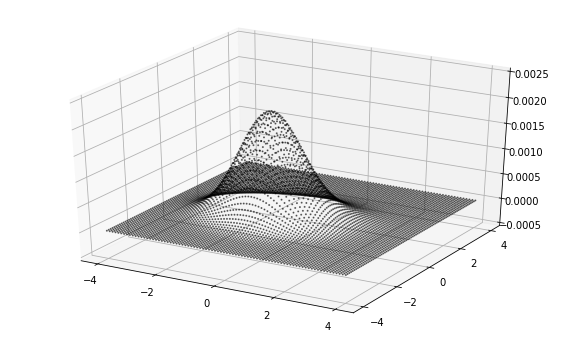

In [19]:
##Classes occur with probability  𝑃(𝜔1)=0.9  and  𝑃(𝜔2)=0.1  be P1 and P2
#P1 = 0.9 and P2 = 0.1
Probab = Probablity_Distribution_1 * P1 + Probablity_Distribution_2 * P2
fig = plt.figure(figsize=(10,6))

axis = plt.axes(projection='3d')
axis.set_xticks([-4,-2,0,2,4])
axis.set_yticks([-4,-2,0,2,4])
axis.set_zlim(-0.0005,0.0025)
axis.scatter(X_axis,Y_axis,Probab,s=1,alpha=0.5, color = 'black')

Bayes error rate for the discretized case: 0.08


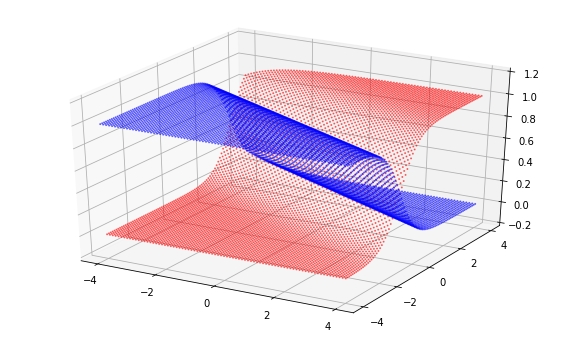

In [20]:
class_posterior_probabilities1 = (Probablity_Distribution_1 * P1)/Probab
class_posterior_probabilities2 = (Probablity_Distribution_2 *P2)/Probab

##previously defined
fig = plt.figure(figsize=(10,6))

axis = plt.axes(projection='3d')
axis.set_xticks([-4,-2,0,2,4])
axis.set_yticks([-4,-2,0,2,4])
axis.set_zlim(-0.2,1.2)

axis.scatter(X_axis,Y_axis,class_posterior_probabilities1,s=1,alpha=0.5, color = 'blue') 
axis.scatter(X_axis,Y_axis,class_posterior_probabilities2,s=1,alpha=0.5, color = 'red')
##find min
np_min=np.minimum(Probablity_Distribution_1 * P1, Probablity_Distribution_2 *P2)
##Sum of array elements over a given axis
np_sum_of_min =np.sum(np_min)

Bayes_error = np.round(np_sum_of_min,3)
print('Bayes error rate for the discretized case:',Bayes_error)

## Exercise 3: Reducing the Variance (5+5 P)

Suppose that the data generating distribution for the second class changes to produce samples much closer to the mean. This variance reduction for the second class is implemented by keeping the first covariance the same (i.e. $\Sigma_1 = \Sigma$) and dividing the second covariance matrix by 4 (i.e. $\Sigma_2 = \Sigma/4$). For this new set of parameters, we can perform the same analysis as in Exercise 2.

* **Plot the new class posterior probabilities $P(\omega_1|\boldsymbol{x})$ and $P(\omega_2|\boldsymbol{x})$ associated to the new covariance matrices, and print the new Bayes error rate.**

Bayes new error rate 0.073


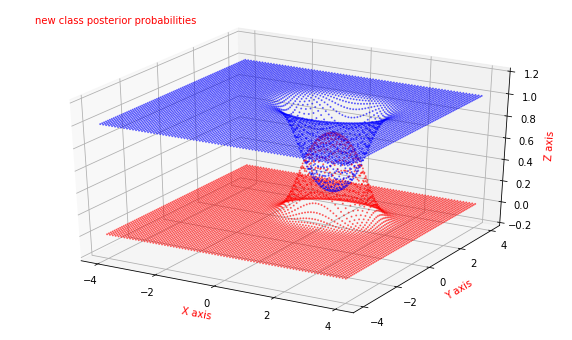

In [21]:
##ALREADY GIVEN
R = np.arange(-4,4+1e-9,0.1)
X_axis,Y_axis = np.meshgrid(R,R)
P1 = 0.9
P2 = 0.1

np_sqrt=np.sqrt(0.5*0.25*0.25);

class1 = np.exp(((X_axis+0.5)**2+2*(Y_axis+0.5)**2)* -.5)/np_sqrt
class2 = np.exp(((X_axis-0.5)**2*4+(Y_axis-0.5)**2*2*4)* -.5)/np_sqrt

sum_class1=np.sum(class1)
sum_class2=np.sum(class2)

Probablity_Distribution_1 = class1/sum_class1
Probablity_Distribution_2 = class2/sum_class2

Probab = Probablity_Distribution_1 * P1 + Probablity_Distribution_2 * P2
## new class posterior probabilities
class_posterior_probabilities1 = (Probablity_Distribution_1 * P1)/Probab
class_posterior_probabilities2 = (Probablity_Distribution_2 *P2)/Probab

fig = plt.figure(figsize=(10,6))

axis = plt.axes(projection='3d')
axis.set_xticks([-4,-2,0,2,4])
axis.set_yticks([-4,-2,0,2,4])
axis.set_zlim(-0.2,1.2)
##Plot the new class posterior probabilities  𝑃(𝜔1|𝑥)  and  𝑃(𝜔2|𝑥)  associated to the new covariance matrices, 

axis.scatter(X_axis,Y_axis,class_posterior_probabilities1,alpha=0.5,s=1, color = 'blue') 
axis.scatter(X_axis,Y_axis,class_posterior_probabilities2,alpha=0.5,s=1,color = 'red')

axis.text2D(0.05, 0.95, 'new class posterior probabilities', transform=axis.transAxes,color='red')

axis.set_xlabel('X axis',color='red')
axis.set_ylabel('Y axis',color='red')
axis.set_zlabel('Z axis',color='red')

##find min
np_min=np.minimum(Probablity_Distribution_1 * P1, Probablity_Distribution_2 *P2)
##Sum of array elements over a given axis
np_sum_of_min =np.sum(np_min)

Bayes_new_error_rate = np.round(np_sum_of_min,3)
## print the new Bayes error rate
print('Bayes new error rate',Bayes_new_error_rate)

Intuition tells us that by variance reduction and resulting concentration of generated data for class 2 in a smaller region of the input space, it should be easier to predict class 2 with certainty at this location. Paradoxally, in this new "dense" setting, we observe that class 2 does not reach full certainty anywhere in the input space, whereas it did in the previous exercise.

* **Explain this paradox.**

As,varience is squared deviation of a random variable from its mean.
It means that closer the data (here points) the less is the deviation and the vice versa.
So  the  Bayes error rate for the discretized case came out to be 0.1  when the varience was scattered 
However, when the varience was scattered  then, new  class posterior probabilities  𝑃(𝜔1|𝑥)  and  𝑃(𝜔2|𝑥)  associated to the new covariance matrices came out to same but the graph varied. 
This shows that varience reduction acc to Monte carlo However, one drawback is that for a large number of risk factors, it requires a large number of replications and takes a long computational time. And is not preferrable unless we  make some modifications to enhance it.